In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import glob
import os

from scipy import signal
from scipy.fft import fft, fftfreq

import matplotlib.pyplot as plt
print(tf.__version__)

2.7.0


   time   ch1   ch2   ch3  button
0   1.0  1.20  2.83  1.52       0
1   3.0  1.15  3.30  1.47       0
2   5.0  1.21  1.88  1.37       0
3   7.0  1.31  0.00  1.30       0
4   9.0  1.32  0.00  1.28       0


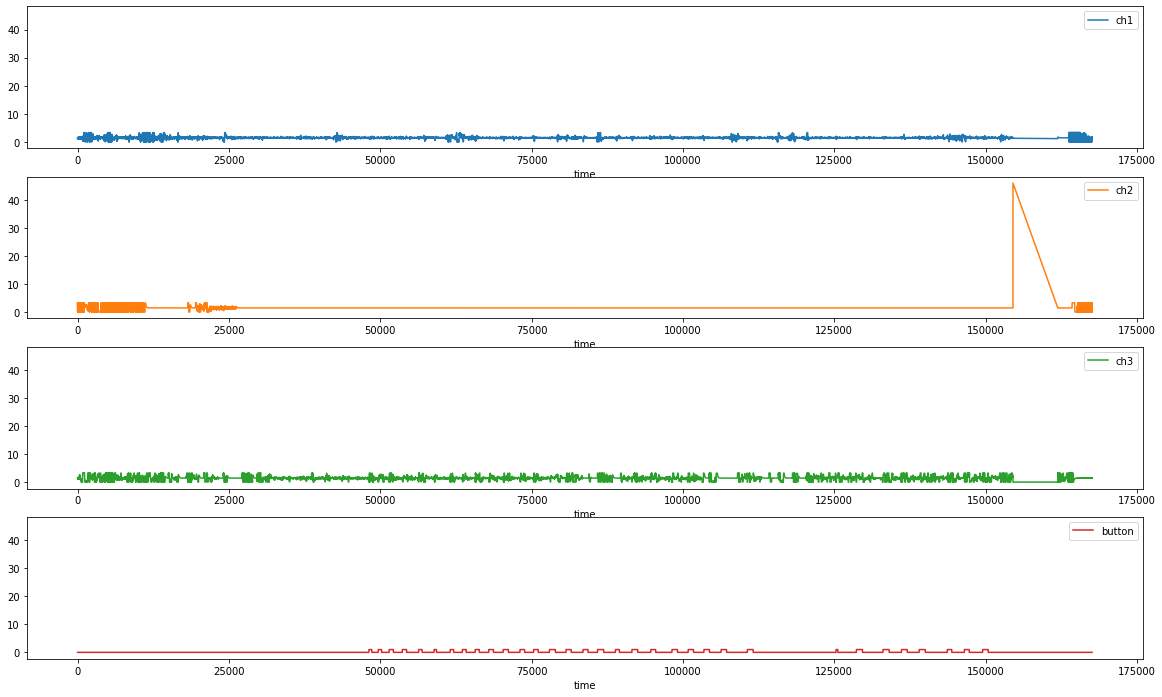

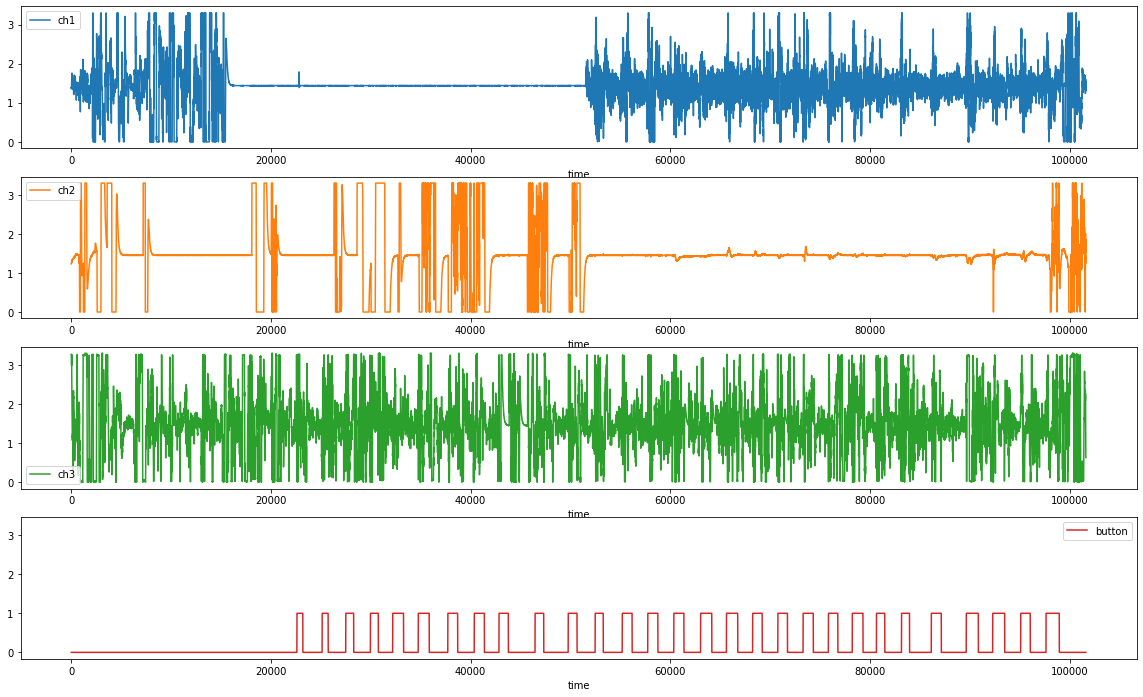

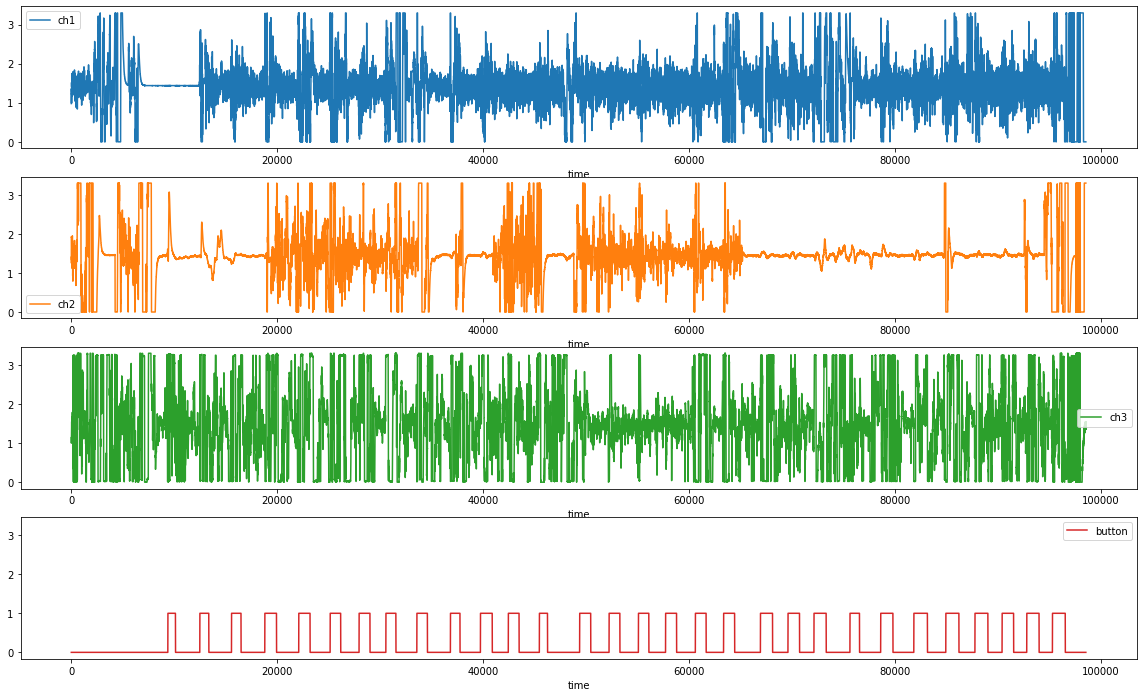

In [4]:
df = pd.read_csv('dataset/20220124/20220124-no.csv')
ax = df.plot(x='time', subplots=True, sharex=False, sharey=True, figsize=(20, 12))

df2 = pd.read_csv('dataset/20220124/20220124-yes.csv')
df2.plot(x='time', subplots=True, sharex=False, sharey=True, figsize=(20, 12))

df3 = pd.read_csv('dataset/20220124/20220124-start.csv')
df3.plot(x='time', subplots=True, sharex=False, sharey=True, figsize=(20, 12))

#df1 = pd.read_csv('dataset/20211212/no-ch1.csv')
#df2 = pd.read_csv('dataset/20211212/no-ch2.csv')
#df3 = pd.read_csv('dataset/20211212/no-ch3.csv')

#df4 = pd.concat([df1['ch1'], df2['ch2'], df3['ch3']], axis=1)
print(df.head())

#ax = df4.plot(subplots=True, sharex=False, sharey=True, figsize=(20, 12))

#df1 = pd.read_csv('dataset/20211212/yes-ch1.csv')
#df2 = pd.read_csv('dataset/20211212/yes-ch2.csv')
#df3 = pd.read_csv('dataset/20211212/yes-ch3.csv')

#df5 = pd.concat([df1['ch1'], df2['ch2'], df3['ch3']], axis=1)
#print(df5.head())

#ax = df5.plot(subplots=True, sharex=False, sharey=True, figsize=(20, 12))

#df1 = pd.read_csv('dataset/20211212/start-ch1.csv')
#df2 = pd.read_csv('dataset/20211212/start-ch2.csv')
#df3 = pd.read_csv('dataset/20211212/start-ch3.csv')

#df6 = pd.concat([df1['ch1'], df2['ch2'], df3['ch3']], axis=1)
#print(df6.head())

#ax = df6.plot(subplots=True, sharex=False, sharey=True, figsize=(20, 12))

In [7]:
import librosa

In [128]:
# mfcc
# 参考:
# * https://aidiary.hatenablog.com/entry/20120225/1330179868
# * https://work-in-progress.hatenablog.com/entry/2020/02/24/103750

mfccs = librosa.feature.mfcc(df['ch1'][3000:4000].values, sr=1000, n_mfcc=20, n_mels=128,
                            win_length=50,
                            hop_length=25,
                            n_fft=512,
                            dct_type=2)

In [129]:
print(mfccs.shape)
print(mfccs[1])

(20, 41)
[165.2159111  131.68671783 123.50301905 117.04953091 142.78178438
 118.85630659 133.27940471 104.22786524 120.85884341 123.65019664
 124.1808669  118.22391666 116.67888416 104.45788731 124.73013074
 121.52366708 123.05240255 120.19406732 115.47443517 116.52994229
 112.64220774 129.92040447 109.32249639 114.58854742 113.11491723
 104.1240629  117.44452147 104.62407618 107.32102006 110.08414757
 102.37581708 115.71492165 101.33071245 112.80903033  87.37309745
 109.71228966  95.89443016 125.10256348 107.66589472 118.29904474
 130.5014223 ]


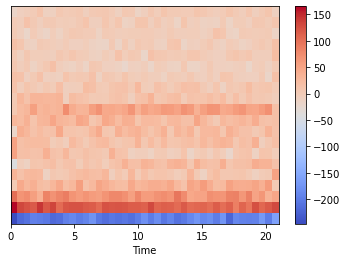

In [130]:
import librosa.display

librosa.display.specshow(mfccs, sr=1000, x_axis='time')
plt.colorbar()

In [96]:
# yes no startをMFCC特徴量で分類
# training 10, validation 2, test 2

# no
# df[5000:6000].plot(x='time', subplots=True, sharex=False, sharey=True, figsize=(20, 12))

n = 5000

train_data = []

# mfccを計算して、各チャンネル6個までを使う
# no
for i in range(20):
    mfccs_no_1 = librosa.feature.mfcc(df4['ch1'][n:n+1000].values, sr=1000, n_mfcc=20, n_mels=128,
                            win_length=50,
                            hop_length=25,
                            n_fft=512,
                            dct_type=2)
    mfccs_no_2 = librosa.feature.mfcc(df4['ch2'][n:n+1000].values, sr=1000, n_mfcc=20, n_mels=128,
                            win_length=50,
                            hop_length=25,
                            n_fft=512,
                            dct_type=2)
    mfccs_no_3 = librosa.feature.mfcc(df4['ch3'][n:n+1000].values, sr=1000, n_mfcc=20, n_mels=128,
                            win_length=50,
                            hop_length=25,
                            n_fft=512,
                            dct_type=2)
    ch1_mfccs_no = np.concatenate([mfccs_no_1[0], mfccs_no_1[1], mfccs_no_1[2], mfccs_no_1[3], mfccs_no_1[4], mfccs_no_1[5], mfccs_no_1[6]], 0)
    ch2_mfccs_no = np.concatenate([mfccs_no_2[0], mfccs_no_2[1], mfccs_no_2[2], mfccs_no_2[3], mfccs_no_2[4], mfccs_no_2[5], mfccs_no_2[6]], 0)
    ch3_mfccs_no = np.concatenate([mfccs_no_3[0], mfccs_no_3[1], mfccs_no_3[2], mfccs_no_3[3], mfccs_no_3[4], mfccs_no_3[5], mfccs_no_3[6]], 0)
    train_data.append(np.concatenate([ch1_mfccs_no, ch2_mfccs_no, ch3_mfccs_no]))
    n = n + 1000
print(len(train_data))

n = 0

# yes
for i in range(20):
    mfccs_yes_1 = librosa.feature.mfcc(df5['ch1'][n:n+1000].values, sr=1000, n_mfcc=20, n_mels=128,
                            win_length=50,
                            hop_length=25,
                            n_fft=512,
                            dct_type=2)
    mfccs_yes_2 = librosa.feature.mfcc(df5['ch2'][n:n+1000].values, sr=1000, n_mfcc=20, n_mels=128,
                            win_length=50,
                            hop_length=25,
                            n_fft=512,
                            dct_type=2)
    mfccs_yes_3 = librosa.feature.mfcc(df5['ch3'][n:n+1000].values, sr=1000, n_mfcc=20, n_mels=128,
                            win_length=50,
                            hop_length=25,
                            n_fft=512,
                            dct_type=2)
    ch1_mfccs_yes = np.concatenate([mfccs_yes_1[0], mfccs_yes_1[1], mfccs_yes_1[2], mfccs_yes_1[3], mfccs_yes_1[4], mfccs_yes_1[5], mfccs_yes_1[6]], 0)
    ch2_mfccs_yes = np.concatenate([mfccs_yes_2[0], mfccs_yes_2[1], mfccs_yes_2[2], mfccs_yes_2[3], mfccs_yes_2[4], mfccs_yes_2[5], mfccs_yes_2[6]], 0)
    ch3_mfccs_yes = np.concatenate([mfccs_yes_3[0], mfccs_yes_3[1], mfccs_yes_3[2], mfccs_yes_3[3], mfccs_yes_3[4], mfccs_yes_3[5], mfccs_yes_3[6]], 0)
    train_data.append(np.concatenate([ch1_mfccs_yes, ch2_mfccs_yes, ch3_mfccs_yes]))
    n = n + 1000
    
print(len(train_data))


n = 0

# start
for i in range(20):
    mfccs_start_1 = librosa.feature.mfcc(df6['ch1'][n:n+1000].values, sr=1000, n_mfcc=20, n_mels=128,
                            win_length=50,
                            hop_length=25,
                            n_fft=512,
                            dct_type=2)
    mfccs_start_2 = librosa.feature.mfcc(df6['ch2'][n:n+1000].values, sr=1000, n_mfcc=20, n_mels=128,
                            win_length=50,
                            hop_length=25,
                            n_fft=512,
                            dct_type=2)
    mfccs_start_3 = librosa.feature.mfcc(df6['ch2'][n:n+1000].values, sr=1000, n_mfcc=20, n_mels=128,
                            win_length=50,
                            hop_length=25,
                            n_fft=512,
                            dct_type=2)
    ch1_mfccs_start = np.concatenate([mfccs_start_1[0], mfccs_start_1[1], mfccs_start_1[2], mfccs_start_1[3], mfccs_start_1[4], mfccs_start_1[5], mfccs_start_1[6]], 0)
    ch2_mfccs_start = np.concatenate([mfccs_start_2[0], mfccs_start_2[1], mfccs_start_2[2], mfccs_start_2[3], mfccs_start_2[4], mfccs_start_2[5], mfccs_start_2[6]], 0)
    ch3_mfccs_start = np.concatenate([mfccs_start_3[0], mfccs_start_3[1], mfccs_start_3[2], mfccs_start_3[3], mfccs_start_3[4], mfccs_start_3[5], mfccs_start_3[6]], 0)
    train_data.append(np.concatenate([ch1_mfccs_start, ch2_mfccs_start, ch3_mfccs_start]))
    n = n + 1000
    
print(len(train_data))
print(len(train_data[0]))

20
40
60
861


In [69]:
# 正解ラベルを作る
# [1, 0, 0]
# [0, 1, 0]
#
# start,stopの単語を2chで取得


label_data = np.concatenate([np.zeros(16), np.ones(16), np.full(16, 2)])

y_train = tf.keras.utils.to_categorical(label_data)
print(y_train)

test_label_data = np.concatenate([np.zeros(4), np.ones(4), np.full(4, 2)])
y_test = tf.keras.utils.to_categorical(test_label_data)
print(y_test)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [97]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras import optimizers

train_X = np.concatenate([train_data[0:16], train_data[20:36], train_data[40:56]])
print(train_X.shape)

print(len(train_X))
print(type(train_X))

# モデルの作成
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(861, )))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='ADAM',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

(48, 861)
48
<class 'numpy.ndarray'>
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 100)               86200     
                                                                 
 flatten_11 (Flatten)        (None, 100)               0         
                                                                 
 dense_56 (Dense)            (None, 100)               10100     
                                                                 
 dropout_33 (Dropout)        (None, 100)               0         
                                                                 
 dense_57 (Dense)            (None, 100)               10100     
                                                                 
 dropout_34 (Dropout)        (None, 100)               0         
                                                                 
 dense_58 (Dense

In [98]:
history = model.fit(train_X, y_train,
                    batch_size=128,   # 64,128みたいに2の倍数がよく使われるらしい
                    epochs=200,
                    verbose=2,
                    validation_split=0.1)

Epoch 1/200
1/1 - 0s - loss: 44.5188 - accuracy: 0.4419 - val_loss: 14.1773 - val_accuracy: 0.0000e+00 - 448ms/epoch - 448ms/step
Epoch 2/200
1/1 - 0s - loss: 30.2387 - accuracy: 0.3953 - val_loss: 1.9128 - val_accuracy: 0.8000 - 25ms/epoch - 25ms/step
Epoch 3/200
1/1 - 0s - loss: 37.5436 - accuracy: 0.3023 - val_loss: 0.0081 - val_accuracy: 1.0000 - 25ms/epoch - 25ms/step
Epoch 4/200
1/1 - 0s - loss: 16.9488 - accuracy: 0.4651 - val_loss: 18.8050 - val_accuracy: 0.0000e+00 - 24ms/epoch - 24ms/step
Epoch 5/200
1/1 - 0s - loss: 19.6406 - accuracy: 0.5581 - val_loss: 54.5364 - val_accuracy: 0.0000e+00 - 24ms/epoch - 24ms/step
Epoch 6/200
1/1 - 0s - loss: 16.5537 - accuracy: 0.4419 - val_loss: 54.8210 - val_accuracy: 0.0000e+00 - 25ms/epoch - 25ms/step
Epoch 7/200
1/1 - 0s - loss: 14.8985 - accuracy: 0.5116 - val_loss: 32.1775 - val_accuracy: 0.0000e+00 - 24ms/epoch - 24ms/step
Epoch 8/200
1/1 - 0s - loss: 15.6501 - accuracy: 0.4419 - val_loss: 5.6037 - val_accuracy: 0.0000e+00 - 25ms/epo

Text(0.5, 0, 'epoch')

<Figure size 432x288 with 0 Axes>

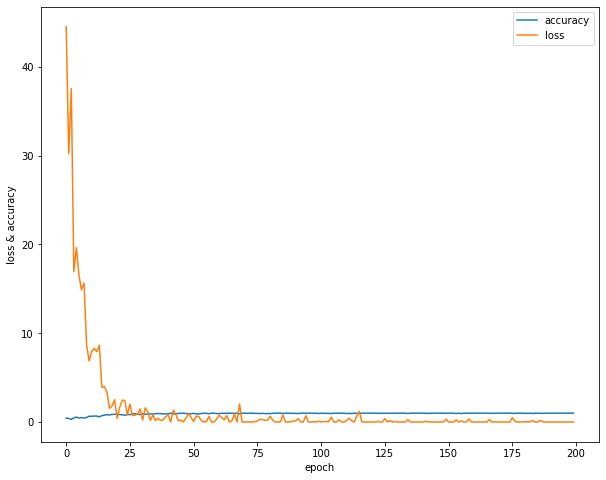

In [99]:
import matplotlib.pyplot as plt

hist_df = pd.DataFrame(history.history)
plt.figure()
hist_df[['accuracy', 'loss']].plot(figsize=(10,8))
plt.ylabel('loss & accuracy')
plt.xlabel('epoch')

In [101]:
test_X = np.concatenate([train_data[10:14], train_data[28:32], train_data[38:42]], 0)

print("Evaluate on test data")
results = model.evaluate(test_X, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
predictions = model.predict(test_X[0:12])
print("predictions shape:", predictions)


Evaluate on test data
1/1 [==============================] - 0s 19ms/step - loss: 2.8839 - accuracy: 0.8333
test loss, test acc: [2.8839142322540283, 0.8333333134651184]
predictions shape: [[1.0000000e+00 5.4354306e-17 4.8990716e-24]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 6.2605130e-24 2.4944444e-38]
 [1.0000000e+00 1.0522267e-27 0.0000000e+00]
 [5.4912710e-29 1.0000000e+00 0.0000000e+00]
 [2.9010749e-25 1.0000000e+00 1.7581106e-37]
 [8.4365302e-17 1.0000000e+00 7.2222868e-25]
 [2.4938014e-20 1.0000000e+00 8.0613242e-23]
 [9.5707202e-01 4.4298409e-03 3.8498081e-02]
 [2.4845445e-19 1.0000000e+00 2.4262927e-14]
 [2.6469991e-23 0.0000000e+00 1.0000000e+00]
 [9.8470251e-32 6.3496847e-35 1.0000000e+00]]
